In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")

# Exploring Data
After specifying the questions you wish to answer, the next step is to explore your data.

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploring 1D Data

These could be 
1. the daily average number of minutes each use spends on your site
2. the number of times each of a collection of data science tutorials was watched
3. the number of pages each data science book you have has

Here are the steps of what you should do to explore this data:
* Get summary statistics
* Plot the data in a histogram; in which you group the data into discrete data buckets and count how many points fall into each bucket

Notice in the example below how plotting histograms of the data helps understainding the distribution of the data.

In [13]:
df = iris.loc[:, iris.columns != "species"]
target = iris.species

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


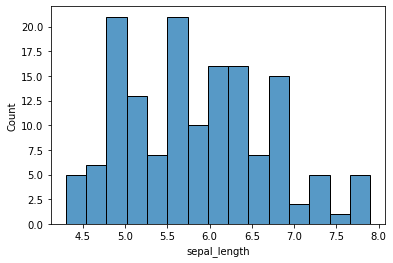

In [6]:
sns.histplot(iris.sepal_length, bins=15);

## Exploring 2D Data

Say you have an extra feature; "years of data science experience". We will scatter the data in this case.

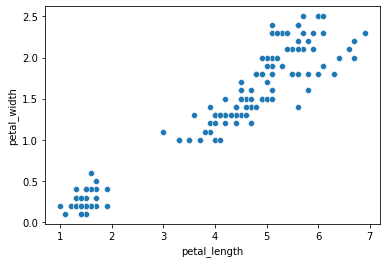

In [32]:
sns.scatterplot(x=df.petal_length, y=df.petal_width);

## Exploring Many Dimensions

In this case, you will want to know how the dimensions (features) are related to one another. One can do that by using **correlation matrix** or **joint plots**.

<AxesSubplot:>

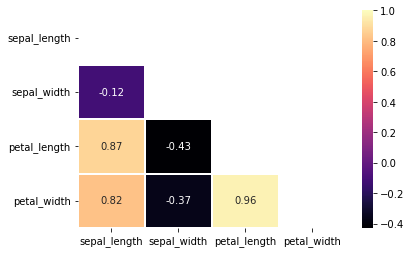

In [27]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), annot=True, mask=mask, linewidths=0.1, vmax=1.0, 
                    square=False, cmap="magma", linecolor='white')

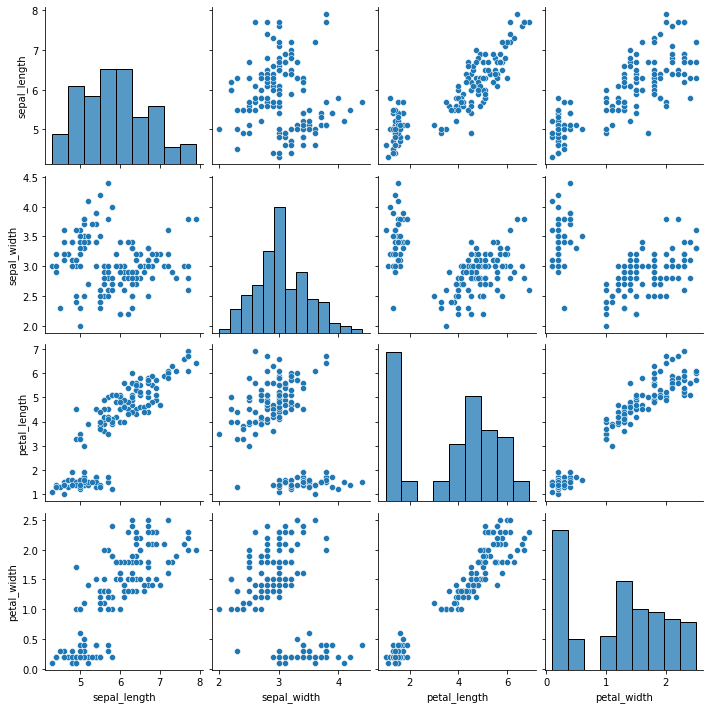

In [16]:
sns.pairplot(data=df)

# Cleaning and Munging

To complete this process you will have to:
1. Convert each datum to the right type
2. Identify outliers
3. Check for missing and bad data

There are three options to handle missing and bad data:
1. Get rid of them
2. Go back to the source and try to fix the bad/missing data
3. Do nothing and cross your fingres :/

Here are a few things you might want to do after you finish cleaning the data:
* Get summary statistics
* Rescal the data
> Many techniques are sensitive to the *scale* of your data. For example, sometimes, when using different units the data description could change, however, if we scale the data so it have **mean 0** and **standard deviation 1** the units will become obsolete.
* Dimensionality reduction
> Sometimes, the useful dimensions of the data might not correspond to the dimensions we have. That's when we need to use dimensionality reduction techniques such as PCA to extract one or more dimensions that capture as much of the varition in the data as possible. n.b. try to use such techniques when you have many dimensions.
>> With PCA, we'd like to find the dimension that displays the highest variance.
>>> You may want to use the elbow method to detrmine how many PCs to use

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(df)

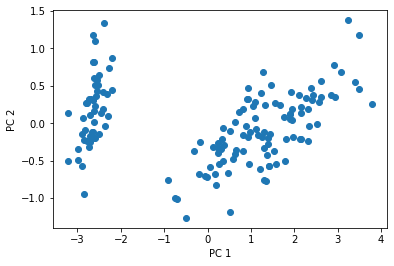

92% of the dataset's variance lies along the first PC
5% of the dataset's variance lies along the sencond PC


In [60]:
plt.scatter(x=X2D[:, 0], y=X2D[:, 1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()
# Print the ratio indicates the proportion of the dataset’s variance that lies along each principal component. ”
print(f"{100*pca.explained_variance_ratio_[0]:.0f}% of the dataset's variance lies along the first PC\n{100*pca.explained_variance_ratio_[1]:.0f}% of the dataset's variance lies along the sencond PC")